In [31]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

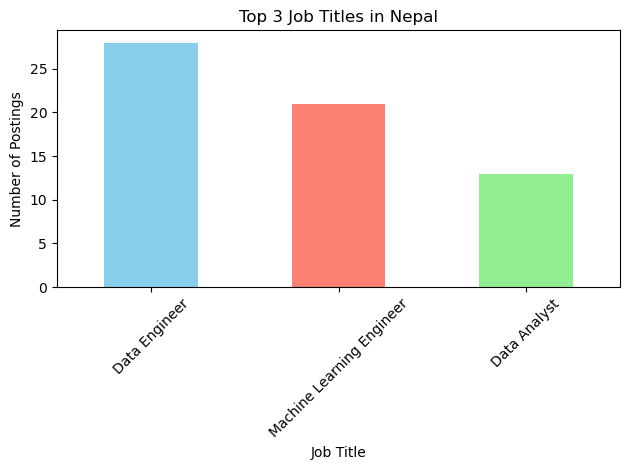

In [32]:
# first explore data analysis for top 3 jobs in Nepal
top_jobs_Nepal = df[df['job_country'] == 'Nepal']['job_title'].value_counts().head(3).index.tolist()
df_top_jobs_Nepal = df[df['job_title'].isin(top_jobs_Nepal) & (df['job_country'] == 'Nepal')]   
job_counts_Nepal = df_top_jobs_Nepal['job_title'].value_counts()
job_counts_Nepal.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Top 3 Job Titles in Nepal')
plt.xlabel('Job Title')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

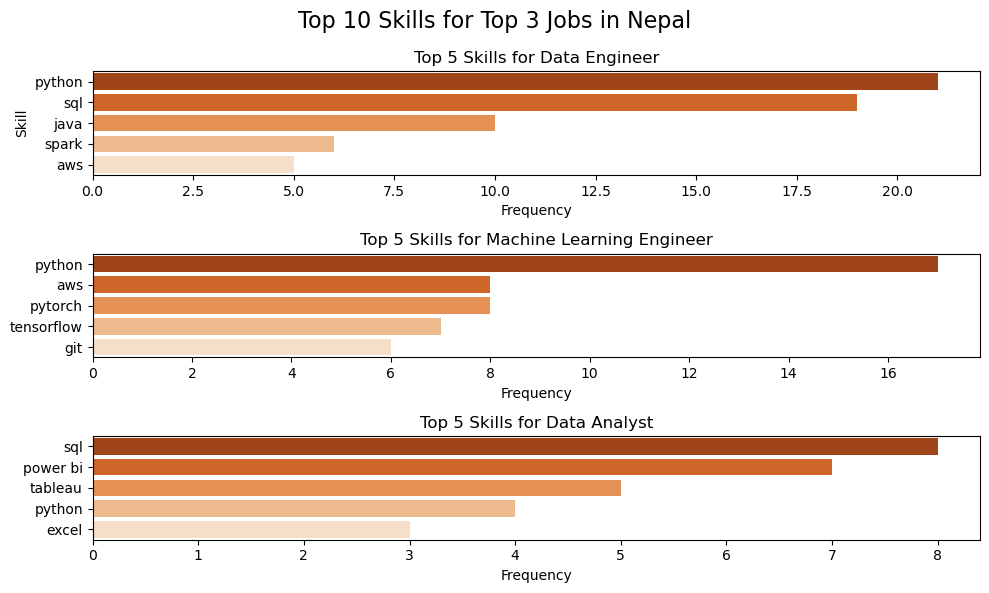

In [37]:
# --- Prepare job_skills column ---
df_top_jobs_Nepal['job_skills'] = df_top_jobs_Nepal['job_skills'].apply(
    lambda x: x if isinstance(x, list) else ([] if pd.isna(x) else [x])
)

# Explode into individual skills
df_top_jobs_Nepal = df_top_jobs_Nepal.explode('job_skills')


# Drop empty values
df_top_jobs_Nepal = df_top_jobs_Nepal[df_top_jobs_Nepal['job_skills'] != ""]

# --- Plotting ---
fig, axes = plt.subplots( 3, 1, figsize=(10, 6))
axes = axes.flatten()


for i, job in enumerate(top_jobs_Nepal):
    df_job = df_top_jobs_Nepal[df_top_jobs_Nepal['job_title_short'] == job]

    # Top 10 skills for this job
    top_skills = df_job['job_skills'].value_counts().head(5)

    # Barplot
    sns.barplot(
        x=top_skills.values,
        y=top_skills.index,
        ax=axes[i],
        hue=top_skills.index,
        palette="Oranges_r",
    
        legend =False
    )

    # Titles and labels
    median_salary = df_job['salary_year_avg'].median()
    axes[i].set_title(f"Top 5 Skills for {job}")
    axes[i].set_xlabel("Frequency")
    axes[i].set_ylabel("Skill" if i == 0 else "")

# Main figure title and layout
fig.suptitle("Top 10 Skills for Top 3 Jobs in Nepal", fontsize=16)
plt.tight_layout()
plt.show()


Germany

In [73]:
# Step 1: Filter the DataFrame for Germany
df_Germany = df[df['job_country'] == 'Germany'].copy()

# Step 2: Get top 3 jobs in Germany
top_jobs_Germany = df_Germany['job_title_short'].value_counts().head(3).index.tolist()

# Step 3: Keep only rows with those top jobs
df_top_jobs_Germany = df_Germany[df_Germany['job_title_short'].isin(top_jobs_germany)]

# --- Prepare job_skills column ---
df_top_jobs_Germany['job_skills'] = df_top_jobs_Germany['job_skills'].apply(
    lambda x: x if isinstance(x, list) else ([] if pd.isna(x) else [x])
)

# Explode into individual skills
df_top_jobs_Germany = df_top_jobs_Germany.explode('job_skills')

# Drop empty values
df_top_jobs_Germany = df_top_jobs_Germany[df_top_jobs_Germany['job_skills'] != ""]


/var/folders/cj/05s72p5j54b7td3xc41my3zh0000gn/T/ipykernel_40259/3080219701.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_jobs_Germany['job_skills'] = df_top_jobs_Germany['job_skills'].apply(


In [74]:
# Group by job and skill, then compute median salary and count
skills_salary = df_top_jobs_Germany.groupby(
    ['job_title_short', 'job_skills']
).agg(
    median_salary=('salary_year_avg', 'median'),
    count=('job_skills', 'size')
).reset_index()

skills_salary = skills_salary.dropna(subset=['median_salary'])


In [75]:
skills_salary

,job_title_short,job_skills,median_salary,count
7,Data Analyst,atlassian,102500.00,26
9,Data Analyst,aws,100500.00,258
10,Data Analyst,azure,89100.00,426
12,Data Analyst,bigquery,166419.50,128
15,Data Analyst,c#,82083.75,73
...,...,...,...,...
511,Data Scientist,tableau,72900.00,630
512,Data Scientist,tensorflow,157500.00,699
514,Data Scientist,terraform,166680.50,51
523,Data Scientist,vba,56700.00,50


In [100]:
top_skills_per_job = skills_salary.groupby('job_title_short').apply(
    lambda x: x.nlargest(10, 'count')
).reset_index(drop=True)


/var/folders/cj/05s72p5j54b7td3xc41my3zh0000gn/T/ipykernel_40259/1964974391.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_skills_per_job = skills_salary.groupby('job_title_short').apply(


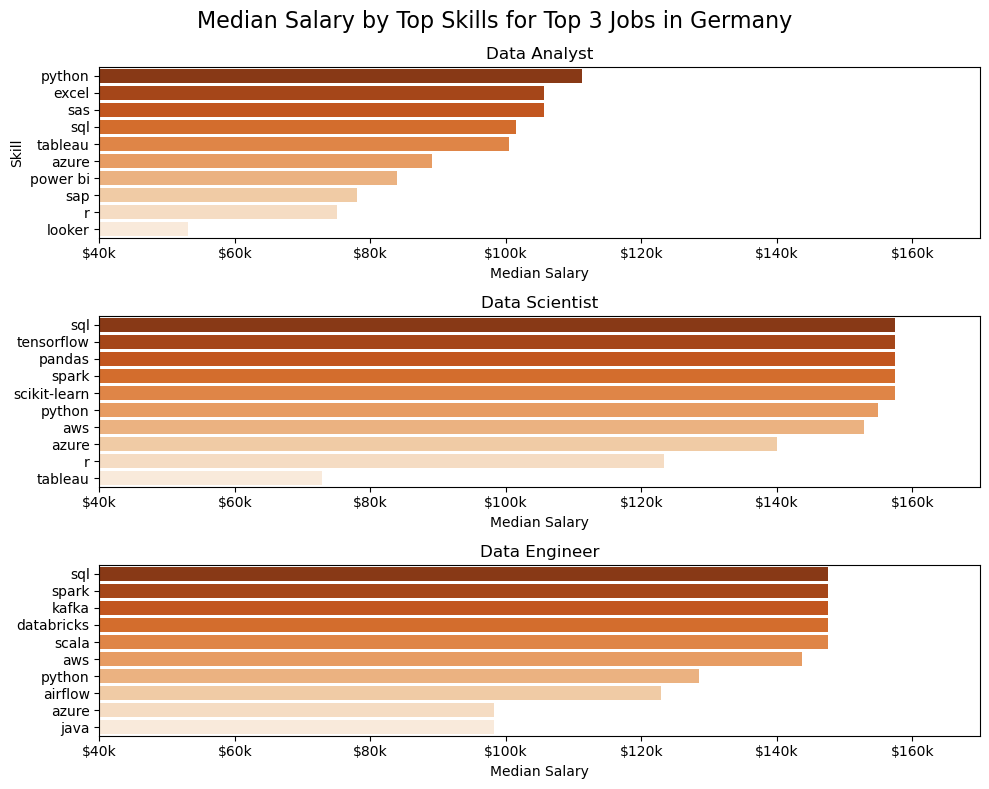

In [101]:
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

num_jobs = len(top_jobs_Germany)
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
axes = axes.flatten()

for i, job in enumerate(top_jobs_Germany):
    df_job = top_skills_per_job[top_skills_per_job['job_title_short'] == job].sort_values('median_salary', ascending=False)



    sns.barplot(
        x='median_salary',
        y='job_skills',

        data=df_job,
        ax=axes[i],
        palette='Oranges_r',
        hue='job_skills',
        legend=False,
        order= df_job['job_skills'],

        

    )

    axes[i].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${int(x/1000)}k"))

    axes[i].set_title(f"{job}")
    axes[i].set_xlabel("Median Salary")
    axes[i].set_ylabel("Skill" if i == 0 else "")
    axes[i].set_xlim(40000, 170000)

fig.suptitle("Median Salary by Top Skills for Top 3 Jobs in Germany", fontsize=16)
plt.tight_layout()
plt.show()


pie charts

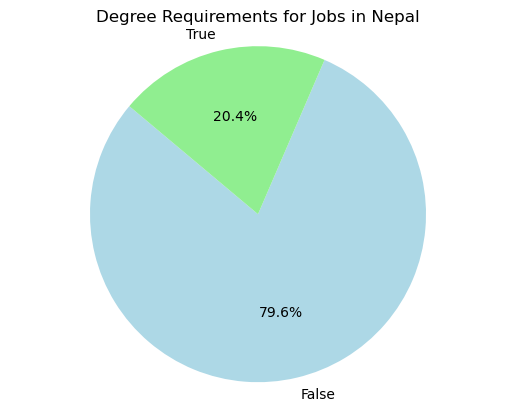

In [ ]:
# pie charts with top jobs with degree requirement, work from home, health insurance, etc. in nepal
df_Nepal = df[df['job_country'] == 'Nepal'].copy()
df_Nepal['job_no_degree_mention'] = df_Nepal['job_no_degree_mention'].fillna('Not Specified')
degree_counts = df_Nepal['job_no_degree_mention'].value_counts()
degree_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'salmon', 'gold'])
plt.title('Degree Requirements for Jobs in Nepal')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [106]:
degree_counts

job_no_degree_mention
False    215
True      55
Name: count, dtype: int64

In [112]:
df_Nepal['job_health_insurance'].value_counts()

job_health_insurance
False    270
Name: count, dtype: int64

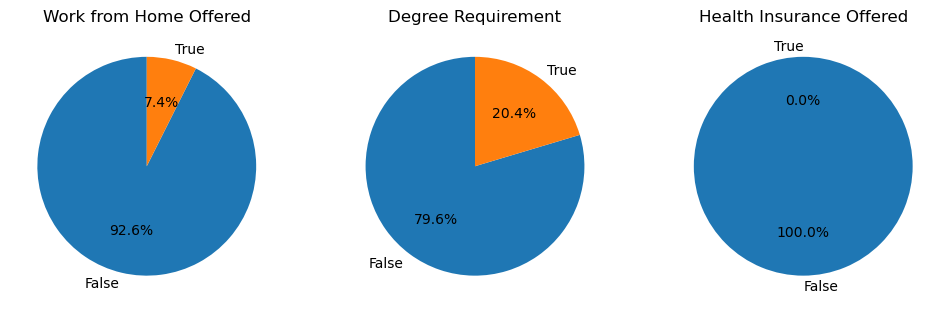

In [116]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    # ensure both False and True exist, fill missing with 0
    counts = df_Nepal[column].value_counts().reindex([False, True], fill_value=0)

    ax[i].pie(
        counts,
        labels=['False', 'True'],
        autopct='%1.1f%%',
        startangle=90
    )
    ax[i].set_title(title)

# optional main title
# plt.suptitle('Benefit Analysis of Data Jobs in Nepal', fontsize=16)

plt.show()
